In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
import torch.utils.data as data_utils
from torch.utils.data import DataLoader

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_raw = pd.read_csv('../../Deeplearning_dataset/BreastCancer.csv')

In [3]:
df_raw

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
X = df_raw.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y = df_raw['diagnosis'].replace({'B':0, 'M':1})

In [5]:
# 학습 데이터와 테스트 데이터를 일정 비율로 나누기
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=2022)

# 학습 데이터
print(f"x_train의 크기: {x_train.shape}")
print(f"y_train의 크기: {y_train.shape}\n")

# 테스트 데이터
print(f"x_test의 크기: {x_test.shape}")
print(f"y_test의 크기: {y_test.shape}")

x_train의 크기: (398, 30)
y_train의 크기: (398,)

x_test의 크기: (171, 30)
y_test의 크기: (171,)


In [6]:
# 학습 데이터 Scaling(scale이 다른 데이터들을 비슷한 scale로 맞춰주기 위하여)
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scale = scaler.transform(x_train)
x_test_scale = scaler.transform(x_test) # train 데이터 기준으로 test 데이터를 scaling

# array => tensor
x_train_tensor = torch.FloatTensor(x_train_scale)
y_train_tensor = torch.FloatTensor(y_train.values)

x_test_tensor = torch.FloatTensor(x_test_scale)
y_test_tensor = torch.FloatTensor(y_test.values)

In [7]:
# 학습 데이터 배치화 시키기
train_data = data_utils.TensorDataset(x_train_tensor, y_train_tensor)
dataloader = DataLoader(train_data, batch_size=100, shuffle=True, drop_last=False)

# 배치화된 데이터 확인
for batch_idx, datas in enumerate(dataloader):
    print(f"batch_index: {batch_idx}")
    print(datas[0].shape)       # x_train
    print(datas[1].shape, '\n') # y_train

batch_index: 0
torch.Size([100, 30])
torch.Size([100]) 

batch_index: 1
torch.Size([100, 30])
torch.Size([100]) 

batch_index: 2
torch.Size([100, 30])
torch.Size([100]) 

batch_index: 3
torch.Size([98, 30])
torch.Size([98]) 



## Model

In [8]:
# parameter 정의
input_size = X.shape[-1]
output_size = 1
learning_rate = 0.005
num_epochs = 200

$$ H(X) = \frac{1}{1+e^{-W^T X}} $$

In [9]:
# model 생성
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(LogisticRegression, self).__init__() # 파생 클래스와 self를 넣어서 현재 클래스가 어떤 클래스인지 명확하게 표시
        self.input_size = input_size
        self.output_size = output_size
        self.linear = torch.nn.Linear(self.input_size, self.output_size)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, input_tensor):
        linear1 = self.linear(input_tensor)
        output = self.sigmoid(linear1)
        return output
    
model = LogisticRegression(input_size, output_size)

$$ cost(W) = -\frac{1}{m} \sum y \log\left(H(x)\right) + (1-y) \left( \log(1-H(x) \right) $$

In [10]:
# 손실함수 정의
criterion = torch.nn.BCELoss() # Binary Cross Entropy Loss
# Optimizer 정의
optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

## Training

In [11]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []

for epoch in range(num_epochs):
    for idx, (x_batch, y_batch) in enumerate(dataloader):
        # Batch 학습
        model.train()
        optimizer.zero_grad() # gradient 초기화
        
        y_train_pred_proba = model(x_batch).reshape(-1)
        y_train_pred = (y_train_pred_proba.data.numpy() > 0.5).astype(np.int)
        loss_train = criterion(y_train_pred_proba, y_batch)
        acc_train = (y_train_pred == y_batch.numpy()).mean()
        
        loss_train.backward() # graident 계산
        optimizer.step() # weight 업데이트
        
    # Validation
    model.eval()
    
    y_test_pred_proba = model(x_test_tensor).reshape(-1) # reshape 대신 squeeze 사용 가능
    y_test_pred = (y_test_pred_proba.data.numpy() > 0.5).astype(np.int)
    loss_test = criterion(y_test_pred_proba, y_test_tensor)
    acc_test = (y_test_pred == y_test_tensor.numpy()).mean()
    
    # epoch 마다 train, test loss 저장
    train_loss.append(loss_train.item())
    test_loss.append(loss_test.item())
    train_acc.append(acc_train)
    test_acc.append(acc_test)
    
    if (epoch + 1) % 10 == 0:
        print(f"epoch: [{epoch+1}] Loss_train: {loss_train:.2f}, Accuracy_train: {acc_train:.2f} / Loss_test: {loss_test:.2f}, Accuracy_test: {acc_test:.2f}")

epoch: [10] Loss_train: 0.50, Accuracy_train: 0.85 / Loss_test: 0.47, Accuracy_test: 0.85
epoch: [20] Loss_train: 0.41, Accuracy_train: 0.88 / Loss_test: 0.38, Accuracy_test: 0.89
epoch: [30] Loss_train: 0.29, Accuracy_train: 0.96 / Loss_test: 0.32, Accuracy_test: 0.92
epoch: [40] Loss_train: 0.27, Accuracy_train: 0.93 / Loss_test: 0.29, Accuracy_test: 0.92
epoch: [50] Loss_train: 0.25, Accuracy_train: 0.93 / Loss_test: 0.26, Accuracy_test: 0.94
epoch: [60] Loss_train: 0.26, Accuracy_train: 0.94 / Loss_test: 0.24, Accuracy_test: 0.95
epoch: [70] Loss_train: 0.25, Accuracy_train: 0.94 / Loss_test: 0.23, Accuracy_test: 0.95
epoch: [80] Loss_train: 0.23, Accuracy_train: 0.93 / Loss_test: 0.21, Accuracy_test: 0.95
epoch: [90] Loss_train: 0.24, Accuracy_train: 0.93 / Loss_test: 0.20, Accuracy_test: 0.95
epoch: [100] Loss_train: 0.20, Accuracy_train: 0.96 / Loss_test: 0.20, Accuracy_test: 0.95
epoch: [110] Loss_train: 0.19, Accuracy_train: 0.96 / Loss_test: 0.19, Accuracy_test: 0.95
epoch: [

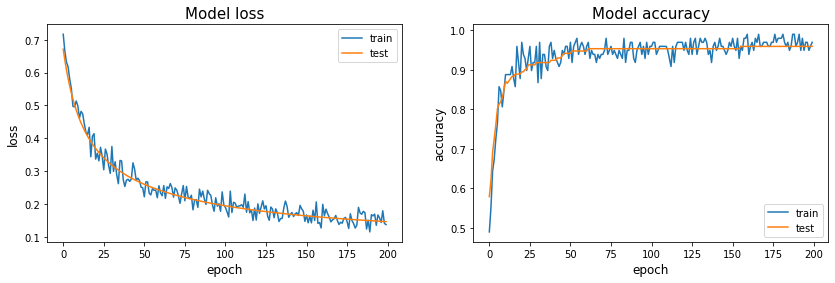

In [12]:
# epoch에 따른 loss, Accuracy 변화

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].plot(range(num_epochs), train_loss, label='train')
axes[0].plot(range(num_epochs), test_loss, label='test')
axes[0].legend()

axes[0].set_title('Model loss', fontsize=15)
axes[0].set_xlabel('epoch', fontsize=12)
axes[0].set_ylabel('loss', fontsize=12)


axes[1].plot(range(num_epochs), train_acc, label='train')
axes[1].plot(range(num_epochs), test_acc, label='test')
axes[1].legend()

axes[1].set_title('Model accuracy', fontsize=15)
axes[1].set_xlabel('epoch', fontsize=12)
axes[1].set_ylabel('accuracy', fontsize=12)

  
plt.show()